<a href="https://colab.research.google.com/github/UzmaMahmoodSSUET/bootcamp_datasci/blob/main/Deep_learning__conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import layers
from keras import models

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [3]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 67s 70ms/step - loss: 0.1776 - accuracy: 0.9441
Epoch 2/5
938/938 [==============================] - 73s 77ms/step - loss: 0.0473 - accuracy: 0.9856
Epoch 3/5
938/938 [==============================] - 62s 66ms/step - loss: 0.0318 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0194 - accuracy: 0.9939


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


313/313 [==============================] - 3s 10ms/step - loss: 0.0378 - accuracy: 0.9886


In [10]:
test_acc

0.9886000156402588

In [11]:
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [12]:
 model_no_max_pool.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
ypred = model.predict(test_images)


313/313 [==============================] - 3s 10ms/step


In [22]:
import numpy as np


In [23]:
y_pred =np.argmax(ypred, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [24]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [26]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [28]:
cf= confusion_matrix(test_labels,y_pred )

In [29]:
cf

array([[ 977,    0,    1,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1123,    3,    1,    0,    4,    2,    1,    0,    1],
       [   2,    0, 1023,    1,    0,    0,    0,    5,    1,    0],
       [   0,    0,    1,  991,    0,   14,    0,    1,    3,    0],
       [   0,    0,    0,    0,  959,    0,    5,    1,    2,   15],
       [   2,    0,    0,    1,    0,  887,    1,    0,    1,    0],
       [   4,    2,    0,    0,    1,    5,  945,    0,    1,    0],
       [   0,    1,    3,    0,    0,    0,    0, 1018,    1,    5],
       [   2,    0,    0,    0,    0,    0,    0,    0,  971,    1],
       [   4,    0,    0,    0,    1,    6,    1,    3,    2,  992]])

In [31]:
import seaborn as sns

<Axes: >

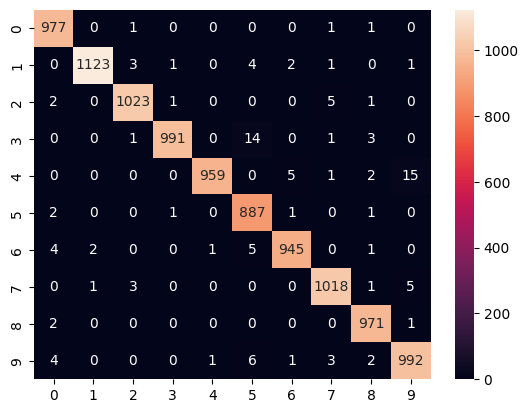

In [38]:
sns.heatmap(cf, fmt='g', annot= True)